## Dataset Description
This project uses a customer churn dataset from a banking institution. The objective is to predict whether a customer will exit the bank based on demographic and financial attributes.

Target variable
Exited
1 - Customer churned
0 - Customer retained

In [50]:
# =================================================
# importing the required libraries for the project
# =================================================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [51]:
## load dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [53]:
## Quick look
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [54]:
## missing values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [55]:
# Remove unnecessary identifier columns that don't contribute to model predictions
df = df.drop (["RowNumber", "CustomerId", "Surname"], axis=1)

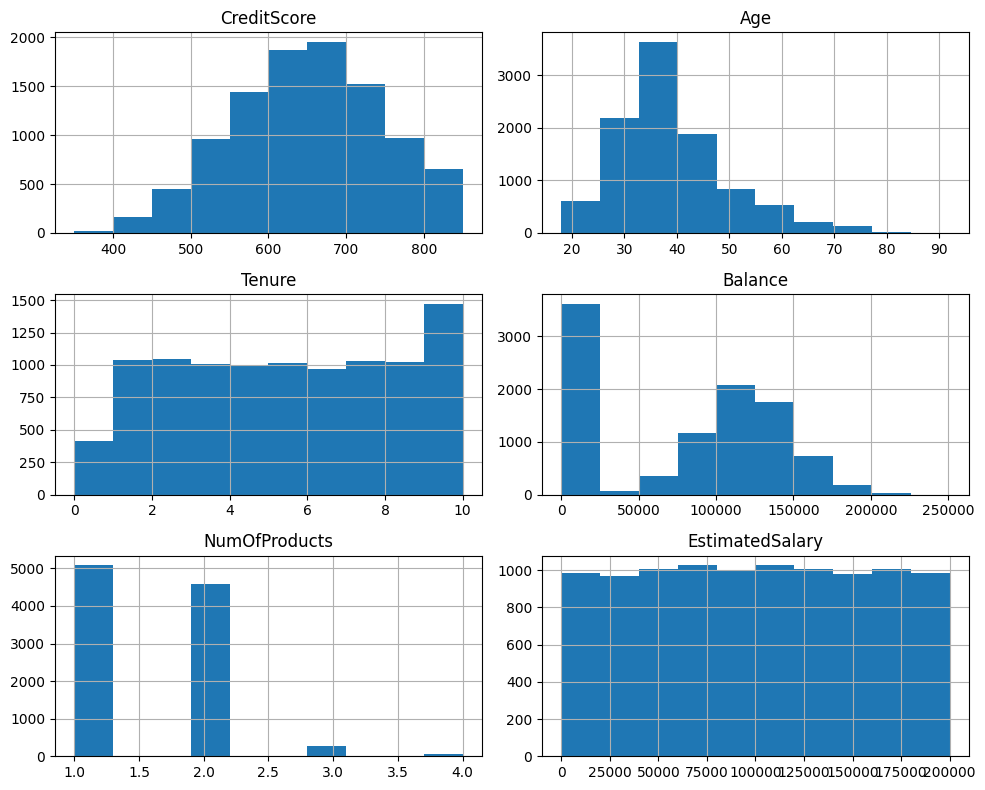

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define list of numeric columns for visualization
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance',
                'NumOfProducts', 'EstimatedSalary']

# Create histograms for all numeric features to visualize their distributions
df[numeric_cols].hist(figsize=(10,8))
plt.tight_layout()
plt.show()


In [57]:
# Check remaining columns after dropping identifiers
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [58]:
# Remove outliers by capping extreme values at 1% and 99% thresholds
for col in ['CreditScore', 'Balance', 'EstimatedSalary']:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = df[col].clip(q1, q99)


In [59]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df_encoded.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [60]:
# Split data into features (X) and target variable (y)
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']


In [61]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features to a standard range
scaler = StandardScaler()
num_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale features to standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Section 2 - Model Selection and Training

Two classification models were selected:
1. Logistic Regression - baseline interpretable model
2. Random Forest Classifier - ensemble model for complex patterns

In [63]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest model with 200 trees
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)  # scaling not essential for trees

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [65]:
import joblib

# Save trained models and scaler for future use
joblib.dump(log_reg, 'log_reg_model.pkl')
joblib.dump(rf, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Section 3 - Prediction and Evaluation


In [66]:
# Make predictions using Logistic Regression model
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Make predictions using Random Forest model
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate and display model performance metrics
def evaluate_model(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'{name} - Accuracy: {acc:.3f}, Precision: {prec:.3f}, '
          f'Recall: {rec:.3f}, F1: {f1:.3f}')
    return acc, prec, rec, f1

# Evaluate both models on test data
metrics_lr = evaluate_model(y_test, y_pred_lr, 'Logistic Regression')
metrics_rf = evaluate_model(y_test, y_pred_rf, 'Random Forest')

Logistic Regression - Accuracy: 0.813, Precision: 0.628, Recall: 0.196, F1: 0.299
Random Forest - Accuracy: 0.865, Precision: 0.774, Recall: 0.476, F1: 0.590


The Random Forest model achieved better performance across most evaluation metrics,particularly recall and F1-score, making it more suitable for churn prediction.

# Section 4 - Visualization and Insights

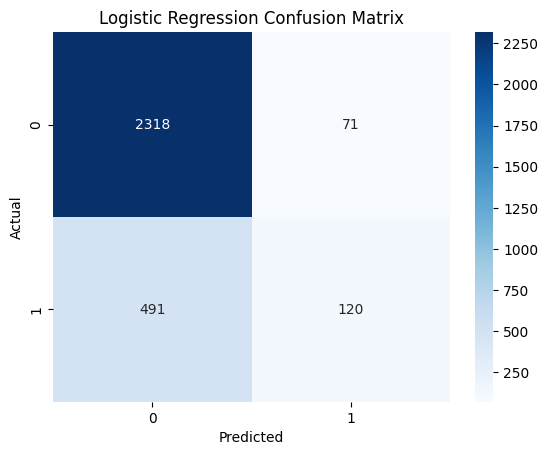

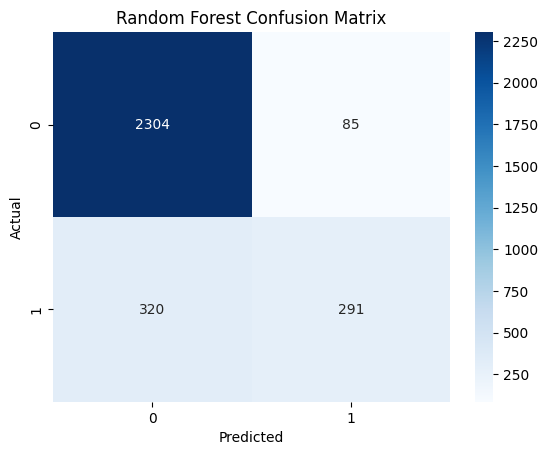

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create and display confusion matrix
def plot_conf_mat(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot confusion matrices for both models
plot_conf_mat(y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')
plot_conf_mat(y_test, y_pred_rf, 'Random Forest Confusion Matrix')


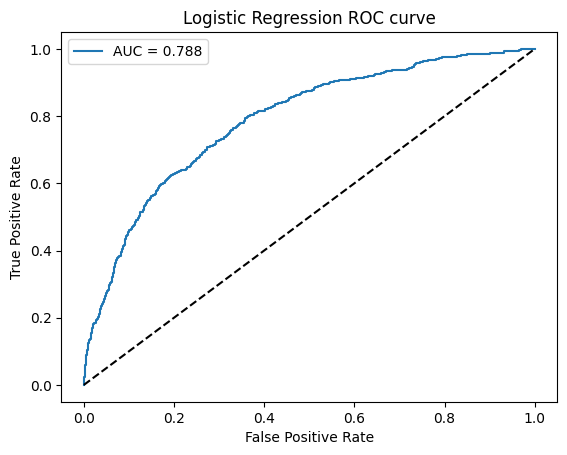

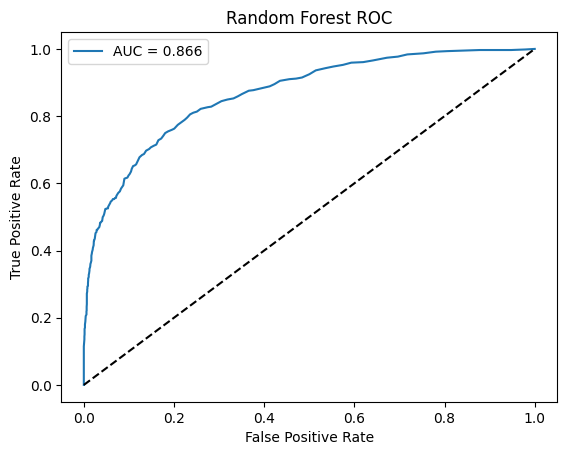

In [69]:

from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve and calculate AUC score
def plot_roc(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Plot ROC curves for both models
plot_roc(y_test, y_prob_lr, 'Logistic Regression ROC curve')
plot_roc(y_test, y_prob_rf, 'Random Forest ROC')


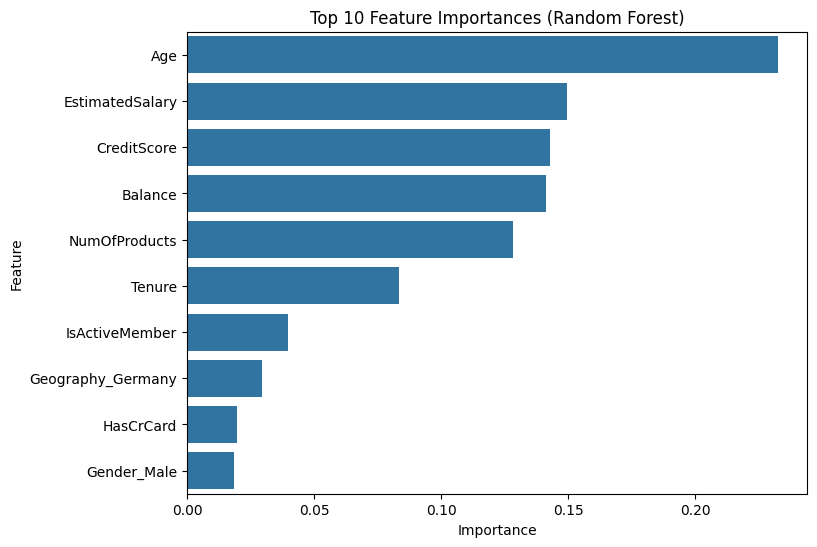

In [70]:
import numpy as np

# Extract feature importances from Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot top 10 most important features
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The Random Forest model demonstrated superior performance in predicting customer churn.
Feature importance analysis showed that age, balance,number of products, and geogragphy significantly influence customer exit decisions.